In [16]:
#import libraries
import numpy
from matplotlib import pyplot
%matplotlib inline

In [21]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    """
    Solves the 1D linear convection equation 
    """
    #spatial grid - discrete
    dx = L / (nx - 1) 
    x = numpy.linspace(0.0, L, num = nx)
    #initial conditions
    u0 = numpy.ones(nx)
    mask = numpy.where((x >= 0.5) & (x <= 1.0))
    u0[mask] = 2.0 #set initial condition at select indices
    #FTBS scheme
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    #plot solution
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label = 'Initial Condition', linestyle='-')
    pyplot.plot(x, u, label = 'Current Condition', linestyle='-')
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5)
    

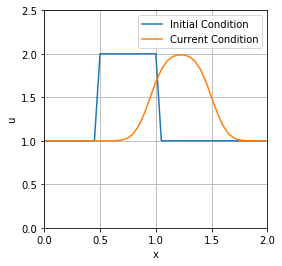

In [22]:
linear_convection(41) # 41 spatial grid points - same as lesson 3 - p/n 1

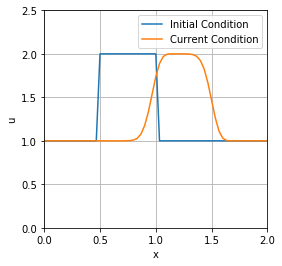

In [23]:
linear_convection(61) # 61 spatial grid points

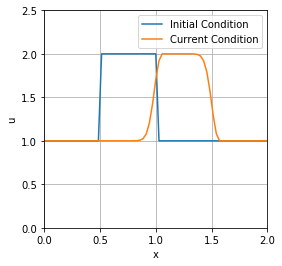

In [24]:
linear_convection(71)

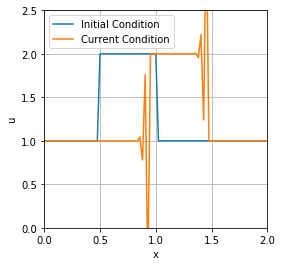

In [25]:
linear_convection(85)

In [26]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma = 0.5, nt=20):
    """
    Solves the 1D linear convection equation 
    Includes a sigma to correctly incorporate the Courant - Friedrichs-Lewy number
    CFL. Sigma = c * dt/dx. This value should be maintained at <= 1 
    for a stable solution
    """
    #spatial grid - discrete
    dx = L / (nx - 1) 
    x = numpy.linspace(0.0, L, num = nx)
    #compute time step based on the CFL value (sigma) given
    dt = sigma * dx / c
    #initial conditions
    u0 = numpy.ones(nx)
    mask = numpy.where((x >= 0.5) & (x <= 1.0))
    u0[mask] = 2.0 #set initial condition at select indices
    #FTBS scheme
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    #plot solution
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label = 'Initial Condition', linestyle='-')
    pyplot.plot(x, u, label = 'Current Condition', linestyle='-')
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5)
    

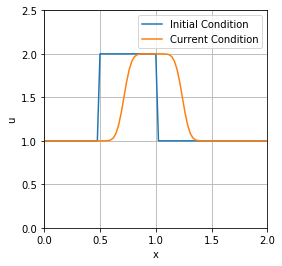

In [27]:
linear_convection_cfl(85)
#note - increasing dx changes dt accordingly. THe total time elapsed
#is now shorter to maintain a stable solution.